# Solutions to Practice Problems based on Week 4 content

## General Course Logistics

* Finish your project proposal. 


Install Gurobi using the instructions here:

1. Download the installer. You can find the installer at the link below. Note that you may have to register for an account before you are able to download the installer.

https://www.gurobi.com/downloads/gurobi-software/ 

2. Run the installer.

3. Apply for a (free) academic license at the link below:

https://www.gurobi.com/downloads/licenses/

4. After you have successfully gotten the software license, run the command it gives you (it should be a gpg key command or something like that).  ***Note: You might need to be on a campus WiFi for this command to be successful.  If you're unable to access campus WiFi, connect through Wiscvpn.  Directions for installing are here https://it.wisc.edu/services/wiscvpn/ ***

5.  Add the package in Julia (Pkg.add("Gurobi")).


## Least Squares 


### An overdetermined system

Suppose we are measuring a road with four points A;B;C and D. We have the following:

* AD = 89m
* AC = 67m
* BD = 53m
* AB = 35m
* CD = 20m.

We are interested in determining the length of $x_1 = AB$, $x_2 = BC$, and $x_3 = CD$. We have 5 equations and only 3 unknowns. Use least squares to determine what $x$ should be. Are we able to find $x$ such that $Ax=b$?

### Answer

We have a set of linear equations:

* $x_1 + x_2 + x_3 = 89$
* $x_1 + x_2 = 67$
* $x_2 + x_3 = 53$
* $x_1 = 35$
* $x_3 = 20$

We can create our matrix $A$ and our vector $b$:

$$A = \begin{bmatrix}1 & 1 & 1 \\ 1 & 1 & 0\\ 0 & 1 & 1 \\ 1 & 0 & 0\\ 0 & 0 & 1\end{bmatrix}$$;   $$b = \begin{bmatrix} 89\\67\\53\\35\\20\end{bmatrix}$$

Now we can solve this as a least squares problem where we want to $\min \|Ax - b\|_2$:


In [1]:
A = [1 1 1; 1 1 0; 0 1 1; 1 0 0; 0 0 1]
b = [89; 67; 53; 35; 20]

x = A \ b

println("x1 = ", x[1]); println("x2 = ", x[2]); println("x3 = ", x[3])

x1 = 35.12500000000002
x2 = 32.49999999999998
x3 = 20.625000000000007



### Autoregressive Models

What if we wanted to do a moving average model, but we didn't have access to the inputs at all? Instead, we areasked to predict future $y$ values based only on the previous $y$ values. One way to do this is by using anautoregressive (AR) model, where each output is approximated by a linear combination of the  most recent outputs (excluding the present one): $$y_t \approx a_1y_{t-1} + a_2y_{t-2}+\dotsm+a_\ell y_{t-\ell}$$.

Using the same dataset from class 'moving avg data.csv,' plot the true $y$, and on the same axes also plot the estimated $\hat{y}$ using the AR model. Use $k=5$ for the AR model. To quantify the difference between estimates,also compute $\|y-\hat{y}\|$.

### Answer

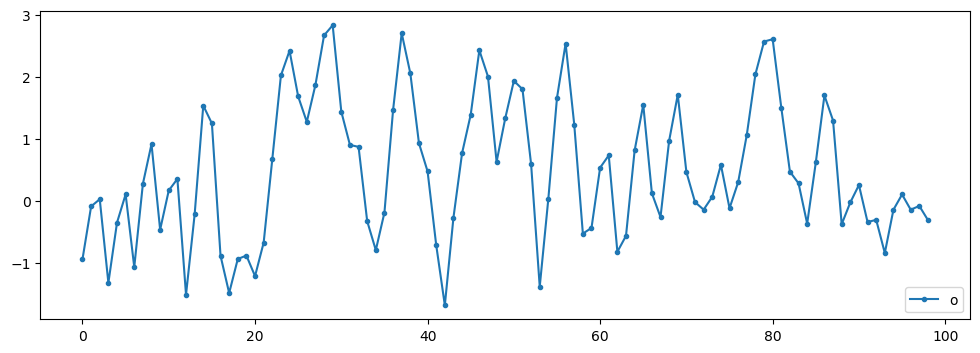

In [2]:
# Load the data file (ref: Boyd/263)
using CSV, DataFrames
df = CSV.read("moving_avg_data.csv", DataFrame, delim=",")

# y is the second column of the data frame we created (outputs)
y = df[:,2]

# T represents length of time (number of observations)
T = length(y)

# plot the y data
using PyPlot
figure(figsize=(12,4))
plot(y,".-");
legend( "output y", loc="lower right");


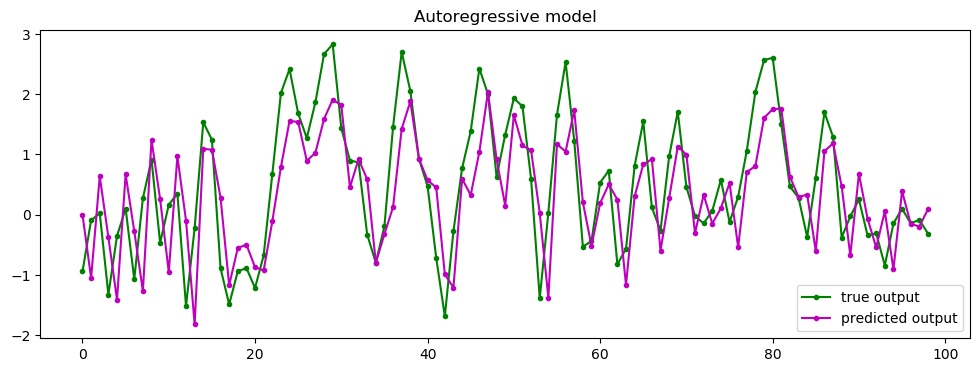


2-norm error: 7.552848731268662


In [3]:
k = 5

# initialize A as a matrix of zeros with T rows and k columns
A = zeros(T,k)

# in each row, the entries are most recent input, second-most recent input, ...
# we need to do some fancy things with the first few rows 
# e.g., when i=1: A[1:end,1] is the whole first column of A. It should contain [0, y[1]],...y[T-1]].
# e.g.2, when i=2: A[2:end,2] is a zero in A[1,2] followed by the rest of the 
# second column of A. It should contain [0, 0,y[1],...y[T-2]].
# etc.
for i = 2:k
    A[i:end,i-1] = y[1:end-i+1]
end

# we can find the optimal weights with the backslash operator
wopt = A\y
# find what the outputs "should" be based on those weights
yest = A*wopt

# plot the calculated outputs vs. the observed outputs 
figure(figsize=(12,4))
plot(y,"g.-",yest,"m.-")
legend(["true output", "predicted output"], loc="lower right");
title("Autoregressive model");
println()
using LinearAlgebra
# also calculate the 2-norm error
println("2-norm error: ", norm(yest-y))

## Tradeoff Problems

* In lecture, we learned that many constraints are objectives in disguise. For one of the problems we have solved in this course, take a constraint of your choice and move it into the objective with a penalty term. See how your problem behaves differently for different values of the penalty parameter. Try building a Pareto curve.

### Answers will vary!


## Regularization

So far in this course, we've seen how to do "standard" polynomial regression by using least squares to fit a curve. However, this is not the only way to fit a model to given data. Consider the following dataset, generated by the code given below (note the data will be different every time you run the code!):


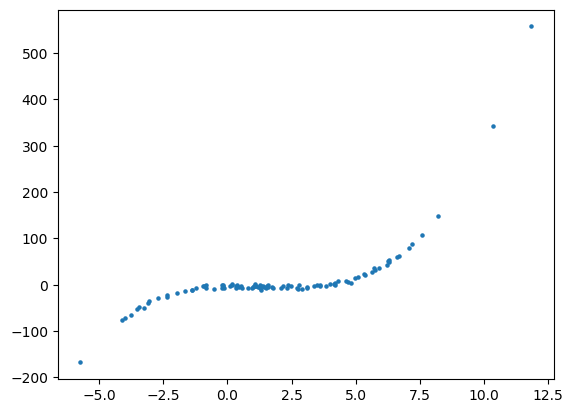

In [6]:
using PyPlot
using Distributions
x = 2 .- 3 .* rand(Normal(0, 1),100)
x = sort(x)
y = x .- 2 .* (x.^2) + 0.5 .* (x.^3) + rand(Normal(-3, 3),100)
scatter(x,y,s=5);

(a) Perform ordinary polynomial regression on this dataset. Generate plots to show how well the data is fit by a polynomials of degree $d=5$. Comment on the size of the coefficients in the model you build. Are they large? Small? Sparse? Smooth?

(b) To get a sparser set of coefficients, we'll use Lasso regression ($L_1$ regularization). Re-sovle the $d=5$ version of the problem with a regularization parameter of $\lambda=500$ and plot the new fit. How does the fit change compared to the non-regularized version in part (a)? How do the magnitudes of the coefficients change?

(c) We could also choose to "smooth" the coefficients by using Ridge regression ($L_2$ regularization). Re-sovle the $d=5$ version of the problem with a regularization parameter of $\lambda=500$ and plot the new fit. How does the fit change compared to the non-regularized version in part (a) and the $L_1$ regularization in part (b)? How do the magnitudes of the coefficients change? Calculate the 2-norm of the solution you obtained in (a) and compare it to the 2-norm of the solution in (c).

### Answer (a)

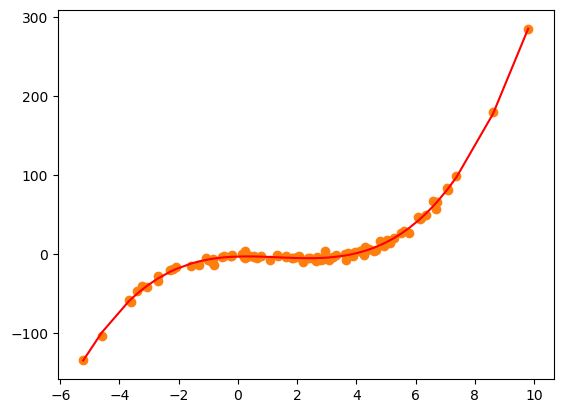

[-3.110059909749018, 1.1301734191505033, -2.0413413255149297, 0.502390072593535, 0.0016029285183024767, -0.00016409212346770707]


6-element Vector{Float64}:
 -3.110059909749018
  1.1301734191505033
 -2.0413413255149297
  0.502390072593535
  0.0016029285183024767
 -0.00016409212346770707

In [7]:
# create the data

using PyPlot
using Distributions
x = 2 .- 3 .* rand(Normal(0, 1),100)
x = sort(x)
y = x .- 2 .* (x.^2) + 0.5 .* (x.^3) + rand(Normal(-3, 3),100)
scatter(x,y,s=5);

b = y # our be will be our output vector y
d = 5 # polynomial degree

# create our A matrix of coefficients on the x^k terms
A = zeros(length(x),d+1)
for i in 1:d+1
    A[:,i] = x.^(i-1)
end

u = A \ b # solve least squares problem
println(u)
yest = A*u

# display our estimated curve on our data points
yest = A*u
scatter( x, y)
plot( x, yest, "r-");

poly_coeff = u # save for later

The values fluctuate between about -3 and 1. Thus, the coefficients are not very large. No coefficients are 0 (not sparse). They are also not smooth, with the biggest change in value occuring between the first and second coefficients.

### Answer (b)

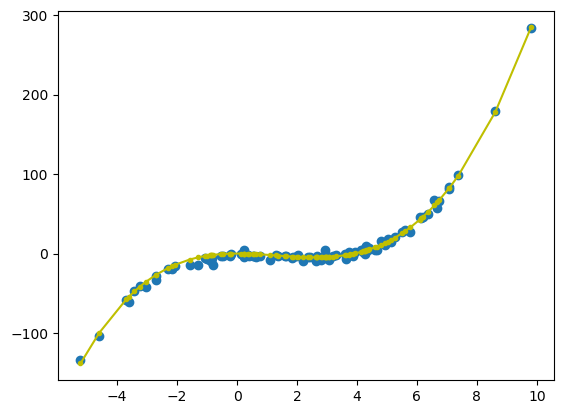

Academic license - for non-commercial use only - expires 2022-06-27
[-1.469097315797215e-11, 1.1864662886346736e-11, -2.1451433038913565, 0.5582259023861582, -0.0015112569181745335, -0.00023872839975999554]


In [8]:
b = y # our be will be our output vector y
d = 5 + 1 # polynomial degree + constant

λ = 500 # regularization weight

# create our A matrix of coefficients
A = zeros(length(x),d)
for i in 1:d
    A[:,i] = x.^(i-1)
end

using JuMP, Gurobi

m = Model(Gurobi.Optimizer)
set_optimizer_attribute(m, "OutputFlag", 0)

# variables for our coefficients
@variable(m, u[1:d])
# variables to linearize our one-norm
@variable(m,t[1:d])
@objective(m, Min, (A*u-b)'*(A*u-b)+ λ*sum(t)) # solve regularized least squares (L1 regularizer)
@constraint(m, con[i in 1:d], t[i] >= u[i]) # cosntraint to relate t and u
@constraint(m, negcon[i in 1:d], t[i] >= -u[i]) # constraint to relate t and -u

optimize!(m)

println(value.(u))

# display our estimated curve on our data points
yest = A*value.(u)
scatter(x,y)
plot( x, yest, "y.-");

That made a big difference! Two of our previously non-zero coefficients are 0. The curve fit looks like it might be a little worse. The magnitude of the coefficients hasn't really changed.

### Answer (c)

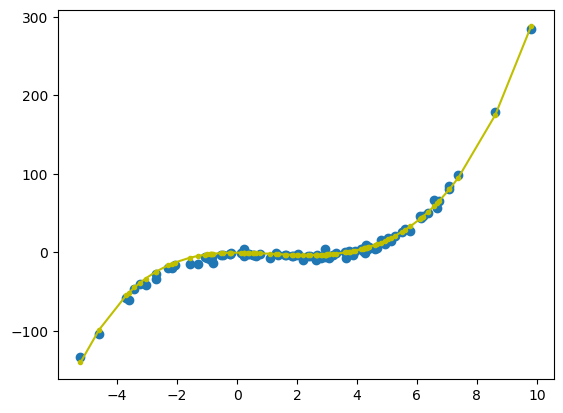

Academic license - for non-commercial use only - expires 2022-06-27
[-0.39778814714818794, 0.0073968961703449205, -1.7285596770133067, 0.5286477730418941, -0.016824012892410378, 0.001228583295704773]


In [9]:
b = y # our be will be our output vector y
d = 5 + 1 # polynomial degree + constant

λ = 500 # regularization weight

# create our A matrix
A = zeros(length(x),d)
for i in 1:d
    A[:,i] = x.^(i-1)
end

using JuMP, Gurobi

m = Model(Gurobi.Optimizer)
set_optimizer_attribute(m, "OutputFlag", 0)

# variables for the coefficients
@variable(m, u[1:d])
# solve the regularized (L2) least squares problem
@objective(m, Min, (A*u-b)'*(A*u-b)+ λ*u'*u)

optimize!(m)

println(value.(u))

# display our estimated curve on our data points
yest = A*value.(u)
scatter(x,y)
plot( x, yest, "y.-");

We lost the sparseness by switching to L2, but the curve appears to fit a little better. The magnitude of the coefficients hasn't changed significantly.

To get a sense of how "smooth" the coefficients are, let's calculate the 2-norm of both this set and the polynomial regression set of coefficients:

In [10]:
using LinearAlgebra

# calculate 2-norm of original coefficients
println("Old: ", norm(poly_coeff))

# calculate 2-norm of new coefficients
println("New: ", norm(value.(u)))

Old: 3.9203618950530648
New: 1.8509353597167468


The 2-norm is about half the size of the 2-norm from the polynomial regression version! The regularized problem makes our solution "smoother."